In [ ]:
from sympy import *
from sympy.plotting import plot as symplot
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

### Biblioteca sympy

Esse módulo, permite trabalhar com **matemática simbólica** (operar com cálculos e fórmulas tal como aprendemos em aulas de matemática e tal como operamos ao resolver uma fórmula "no papel")

exemplo:



Definição de variável simbólica $x$ e de função $y$ (ou $f(x)$). Ao executar a variável `y` ao final do bloco obtemos a imagem com a expressão matemática na sua escrita simbólica)

In [ ]:
x = symbols('x')
y = sin(2*np.pi * x * 1/10)
z = cos(2*np.pi * x * 1/10)

E ela pode ser plotada assim:

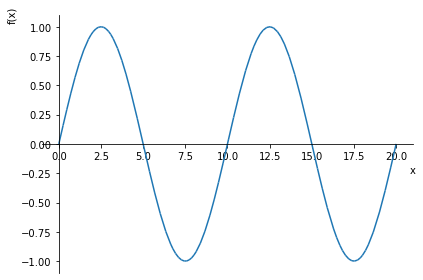

In [ ]:
symplot(y,(x,0,20))

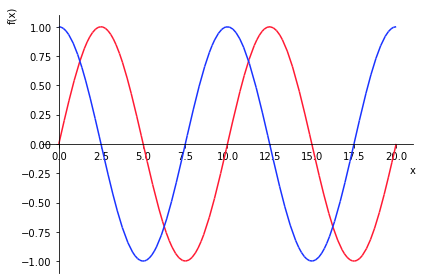

In [65]:
p1 = symplot(y,(x,0,20),show=False,line_color=(1,0.1,0.2))
p2 = symplot(z,(x,0,20),show=False,line_color=(0.1,0.2,1))
p1.append(p2[0])
p1.show()

In [ ]:
dir(p1)

['__class__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_backend',
 '_series',
 'annotations',
 'append',
 'aspect_ratio',
 'autoscale',
 'axis',
 'axis_center',
 'backend',
 'extend',
 'fill',
 'legend',
 'margin',
 'markers',
 'rectangles',
 'save',
 'show',
 'size',
 'title',
 'xlabel',
 'xlim',
 'xscale',
 'ylabel',
 'ylim',
 'yscale']

Para utilizar uma expressão numérica definida assim para gerar áudio, precisamos primeiramente transformá-la numa função computacional. O SymPy faz isso com a função "lambdify":

In [ ]:
sr = 44100
dur = 1
freq = 220
t = symbols('t')                        # definição de variável
expr = sin(2 * pi * t * freq)           # definição de função
f = lambdify(t, expr, 'numpy')          # transformar a função simbólica do sympy em uma função lambda aplicável a uma série de números (vetor) definidas em numpy
x = np.array(np.arange(0,sr*dur)/sr)    # vetor de números em numpy
f(x)

array([ 0.        ,  0.03133956,  0.06264832, ..., -0.09389555,
       -0.06264832, -0.03133956])

Plotando com matplotlib:

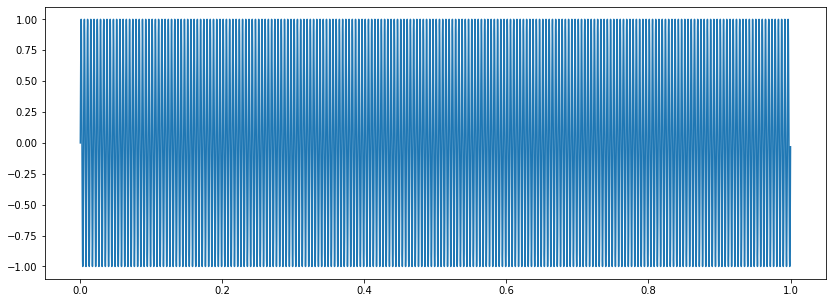

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(x,f(x)) #plot de todo o áudio gerado (via librosa)

Escutando com o IPython.display.Audio

In [ ]:
ipd.Audio(f(x), rate=sr)